In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/Dataset Idealista/"
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
df.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,has3DTour,has360,hasStaging,highlight,savedAd,notes,topNewDevelopment,topPlus,parkingSpace,newDevelopmentFinished
0,107605761,https://img4.idealista.com/blur/WEB_LISTING/0/...,LCB35387,33,9,650000.0,"{'price': {'amount': 650000.0, 'currencySuffix...",flat,sale,68.0,...,False,False,False,{'groupDescription': 'Destacado'},{},[],False,False,NaN,NaN
1,107616236,https://img4.idealista.com/blur/WEB_LISTING/0/...,GTRE-01378,23,1,209000.0,"{'price': {'amount': 209000.0, 'currencySuffix...",flat,sale,65.0,...,False,False,False,NaN,{},[],False,False,NaN,NaN
2,107616167,https://img4.idealista.com/blur/WEB_LISTING/0/...,V1459,27,2,193000.0,"{'price': {'amount': 193000.0, 'currencySuffix...",penthouse,sale,50.0,...,False,False,False,NaN,{},[],False,False,NaN,NaN
3,107570416,https://img4.idealista.com/blur/WEB_LISTING/0/...,UGB1799,28,1,189000.0,"{'price': {'amount': 189000.0, 'currencySuffix...",flat,sale,80.0,...,False,False,False,NaN,{},[],False,False,NaN,NaN
4,107563952,https://img4.idealista.com/blur/WEB_LISTING/0/...,UGB1798,24,NaN,220000.0,"{'price': {'amount': 220000.0, 'currencySuffix...",flat,sale,73.0,...,False,False,False,NaN,{},[],False,False,NaN,NaN


In [ ]:
# Convertir columnas al tipo de dato adecuado
import pandas as pd

# Convertir fechas si hay alguna en el dataset
date_columns = ['publicationDate', 'updatedAt']  # Ajustar si hay columnas de fecha en el dataset
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convertir números a enteros donde aplique
int_columns = ['numPhotos', 'rooms', 'bathrooms', 'floor']
for col in int_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Convertir precios y métricas económicas a float
float_columns = ['price', 'size', 'priceByArea']
for col in float_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Mostrar tipos de datos después de la conversión
print(df.dtypes)


propertyCode                int64
thumbnail                  object
externalReference          object
numPhotos                   int64
floor                       int64
price                     float64
priceInfo                  object
propertyType               object
operation                  object
size                      float64
exterior                   object
rooms                       int64
bathrooms                   int64
address                    object
province                   object
municipality               object
district                   object
country                    object
neighborhood               object
latitude                  float64
longitude                 float64
showAddress                  bool
url                        object
distance                    int64
description                object
hasVideo                     bool
status                     object
newDevelopment               bool
hasLift                    object
priceByArea   

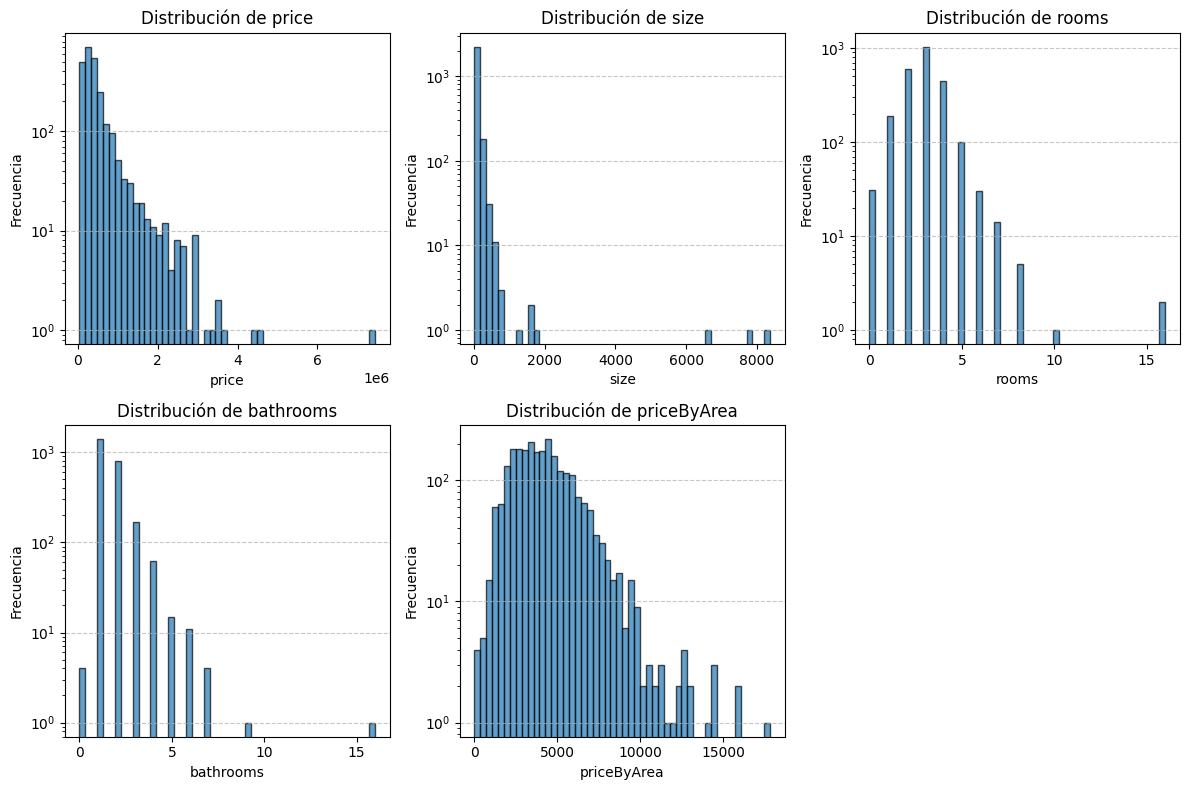

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = ['price', 'size', 'rooms', 'bathrooms', 'priceByArea']

# Crear histogramas
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {col}")
    plt.yscale("log")  # Escala logarítmica para mejor visualización
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


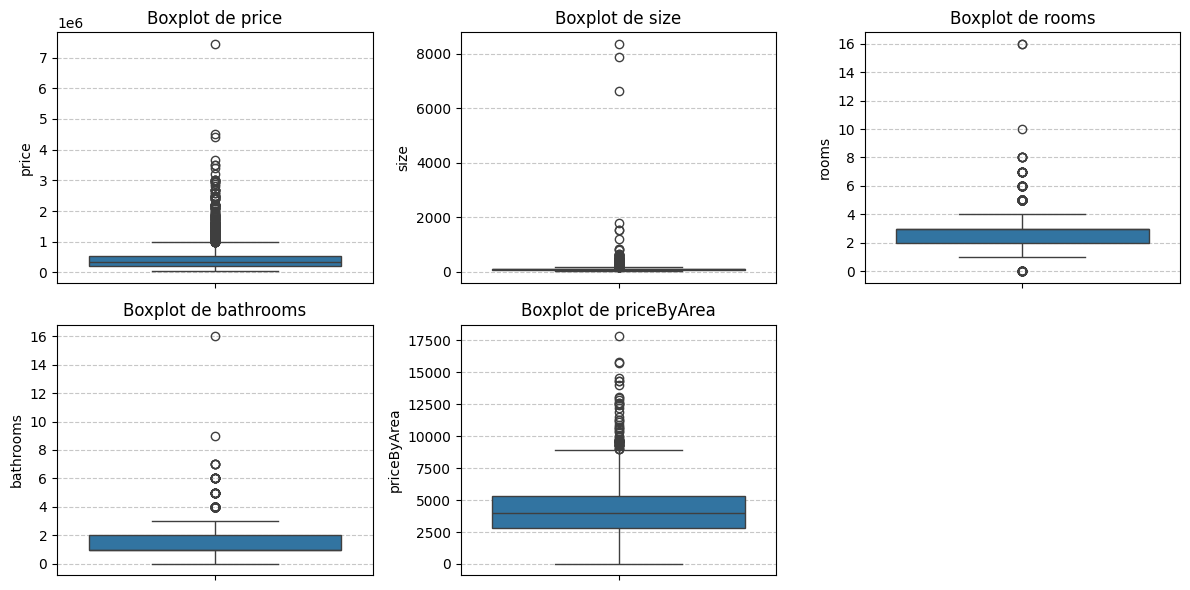

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.ylabel(col)
    plt.title(f"Boxplot de {col}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


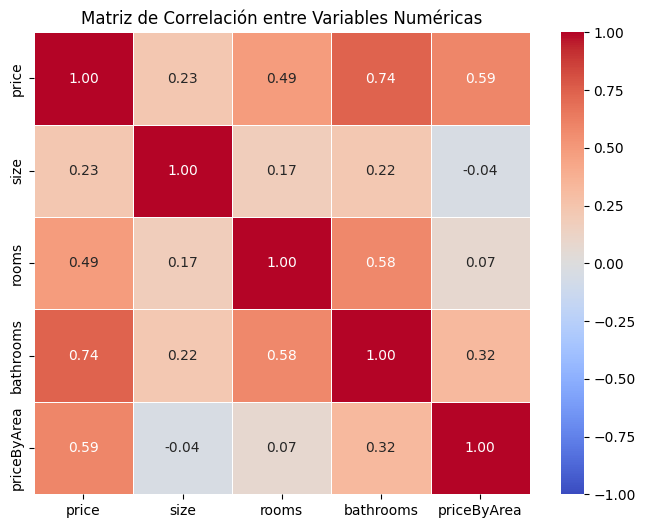

In [ ]:
import seaborn as sns
import numpy as np

# Calcular la correlación
corr = df[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


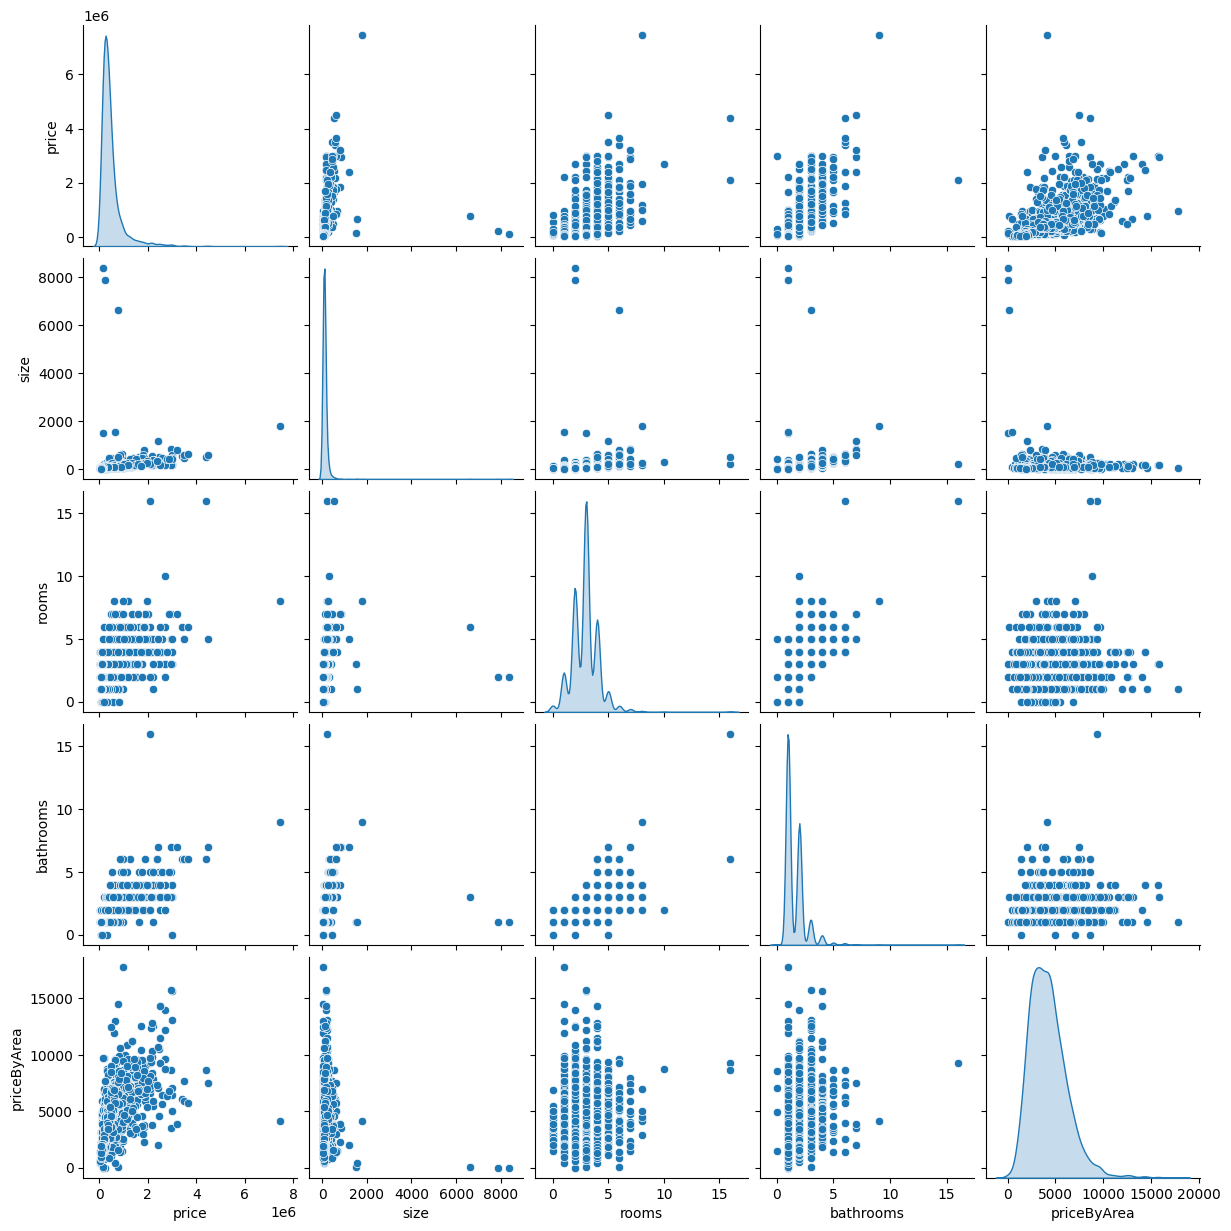

In [ ]:
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.show()


In [ ]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 49.4 MB/s eta 0:00:00


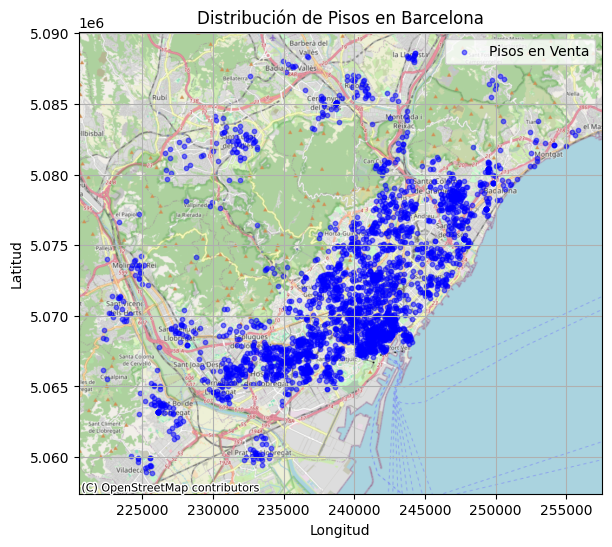

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convertir el DataFrame de pisos en un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs="EPSG:4326")

# Convertir a sistema de coordenadas proyectadas para trabajar con contextily
gdf = gdf.to_crs(epsg=3857)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los puntos de los pisos
gdf.plot(ax=ax, markersize=10, alpha=0.5, color='blue', label="Pisos en Venta")

# Agregar fondo de mapa de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Configurar el gráfico
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución de Pisos en Barcelona")
plt.legend()
plt.grid(True)

# Mostrar el mapa
plt.show()


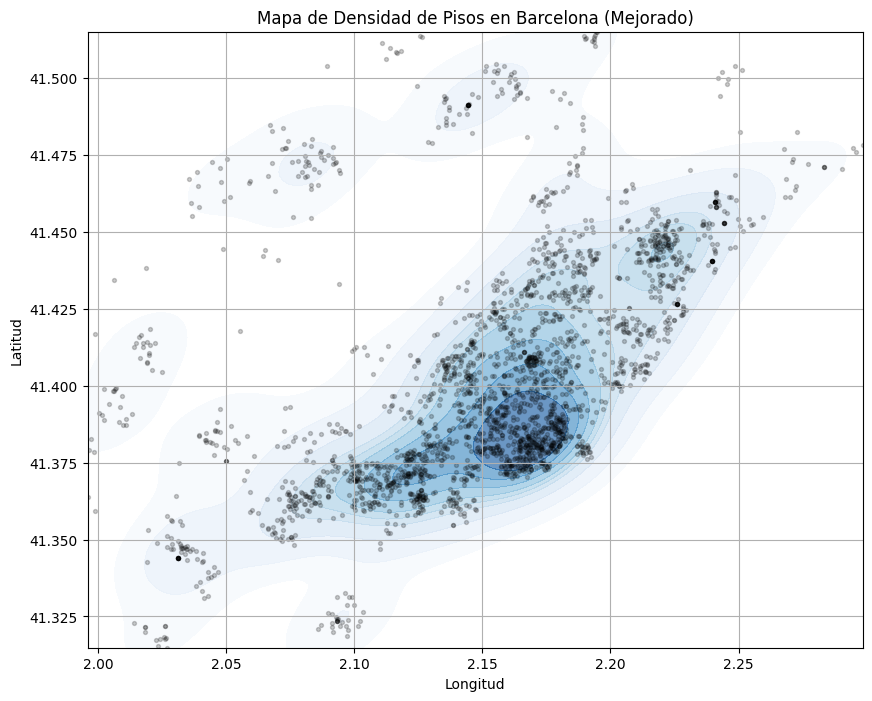

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar valores nulos en coordenadas
df_filtered = df[['longitude', 'latitude']].dropna()

plt.figure(figsize=(10, 8))

# Graficar mapa de densidad ajustando parámetros
sns.kdeplot(
    x=df_filtered['longitude'],
    y=df_filtered['latitude'],
    cmap="Blues",
    fill=True,
    alpha=0.6,
    levels=10  # Aumentar el número de niveles para mejor detalle
)

# Agregar puntos individuales con mayor transparencia
plt.scatter(df_filtered['longitude'], df_filtered['latitude'], alpha=0.2, s=8, c='black')

# Ajustar límites para mejorar la escala del mapa
plt.xlim(df_filtered['longitude'].min(), df_filtered['longitude'].max())
plt.ylim(df_filtered['latitude'].min(), df_filtered['latitude'].max())

# Configuración del gráfico
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mapa de Densidad de Pisos en Barcelona (Mejorado)")
plt.grid(True)

# Mostrar el mapa
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Copia del dataset original
df_clean = df.copy()

# 1️⃣ Seleccionar columnas numéricas relevantes
numerical_cols = [
    "size", "rooms", "bathrooms", "latitude", "longitude", "distance", "numPhotos", "priceByArea"
]

# 2️⃣ Seleccionar columnas categóricas relevantes
categorical_cols = [
    "propertyType", "operation", "floor", "exterior", "province", "municipality",
    "district", "neighborhood", "status", "hasLift", "newDevelopment"
]

# 3️⃣ Imputar valores faltantes en variables categóricas
df_clean["floor"].fillna("unknown", inplace=True)
df_clean["exterior"].fillna("unknown", inplace=True)
df_clean["hasLift"].fillna("unknown", inplace=True)
df_clean["district"].fillna("unknown", inplace=True)
df_clean["neighborhood"].fillna("unknown", inplace=True)

# 4️⃣ Aplicar One-Hot Encoding a variables categóricas
df_encoded = pd.get_dummies(df_clean[categorical_cols], drop_first=True)

# 5️⃣ Combinar con variables numéricas y la variable objetivo "price"
df_final = pd.concat([df_clean[numerical_cols], df_encoded, df_clean["price"]], axis=1)

# 6️⃣ Separar variables predictoras (X) y variable objetivo (y)
X = df_final.drop(columns=["price"])
y = df_final["price"]

# 7️⃣ Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Datos preprocesados y listos para entrenar los modelos")
print(f"Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")


✅ Datos preprocesados y listos para entrenar los modelos
Tamaño de entrenamiento: (1960, 249), Tamaño de prueba: (490, 249)


<ipython-input-6-aabe39d1b26f>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["floor"].fillna("unknown", inplace=True)
<ipython-input-6-aabe39d1b26f>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = lr_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔹 Linear Regression Results:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


🔹 Linear Regression Results:
MAE: 132646.0229218368
RMSE: 232799.5733363002
R² Score: 0.7876819839102089


Ridge Regresion

In [ ]:
from sklearn.linear_model import Ridge

# Entrenar el modelo
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = ridge_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔹 Ridge Regression Results:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


🔹 Ridge Regression Results:
MAE: 128272.54155322642
RMSE: 226424.23194618695
R² Score: 0.799151638148315


In [ ]:
from sklearn.linear_model import Lasso

# Entrenar el modelo
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = lasso_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔹 Lasso Regression Results:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


🔹 Lasso Regression Results:
MAE: 132505.29269619755
RMSE: 232507.5169751453
R² Score: 0.7882143726085535


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+13, tolerance: 4.496e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔹 Random Forest Regression Results:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


🔹 Random Forest Regression Results:
MAE: 23816.22206122449
RMSE: 91002.4402520445
R² Score: 0.9675564354480718


Evaluación de Modelos:
                            MAE           RMSE        R2
Regresión Lineal  130750.307993  228432.908460  0.795572
Random Forest      23484.509061   88672.455772  0.969197


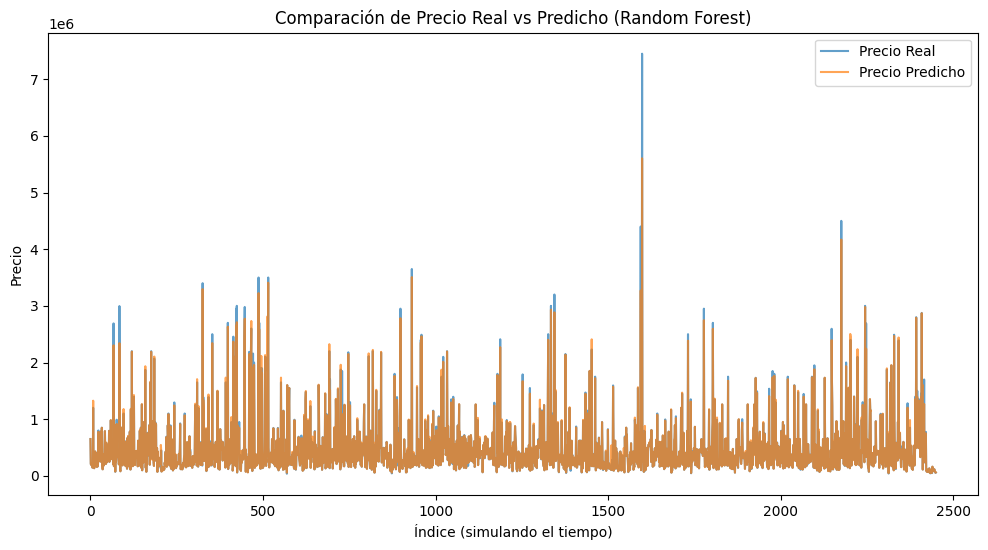

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Separar variables predictoras y variable objetivo
X = df_final.drop(columns=["price"])  # Variables predictoras
y = df_final["price"]  # Variable objetivo

# 2️⃣ Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Escalar las variables numéricas para modelos que lo requieran
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Modelos a probar
models = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# 5️⃣ Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# 6️⃣ Seleccionar el mejor modelo (mayor R²)
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_model = models[best_model_name]

# 7️⃣ Reentrenar el mejor modelo con todos los datos disponibles
best_model.fit(X_train_scaled, y_train)

# 8️⃣ Predicción final sobre todo el dataset ordenado
y_pred_final = best_model.predict(scaler.transform(X))

# 9️⃣ Crear un DataFrame con resultados ordenados
df_results = df_final.copy()
df_results["price_pred"] = y_pred_final

# 🔟 Visualizar evaluación de modelos
df_metrics = pd.DataFrame(results).T
print("Evaluación de Modelos:")
print(df_metrics)

# 🔥 Graficar comparación de precios reales vs predichos en orden temporal
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results["price"], label="Precio Real", alpha=0.7)
plt.plot(df_results.index, df_results["price_pred"], label="Precio Predicho", alpha=0.7)
plt.xlabel("Índice (simulando el tiempo)")
plt.ylabel("Precio")
plt.legend()
plt.title(f"Comparación de Precio Real vs Predicho ({best_model_name})")
plt.show()


Evaluación del modelo en cada conjunto:
        Conjunto           MAE          RMSE        R²
0          Train  11300.433890  65181.949368  0.982121
1           Test  23693.742883  77711.760415  0.967986
2  Extrapolación  27502.542571  91680.698597  0.967760


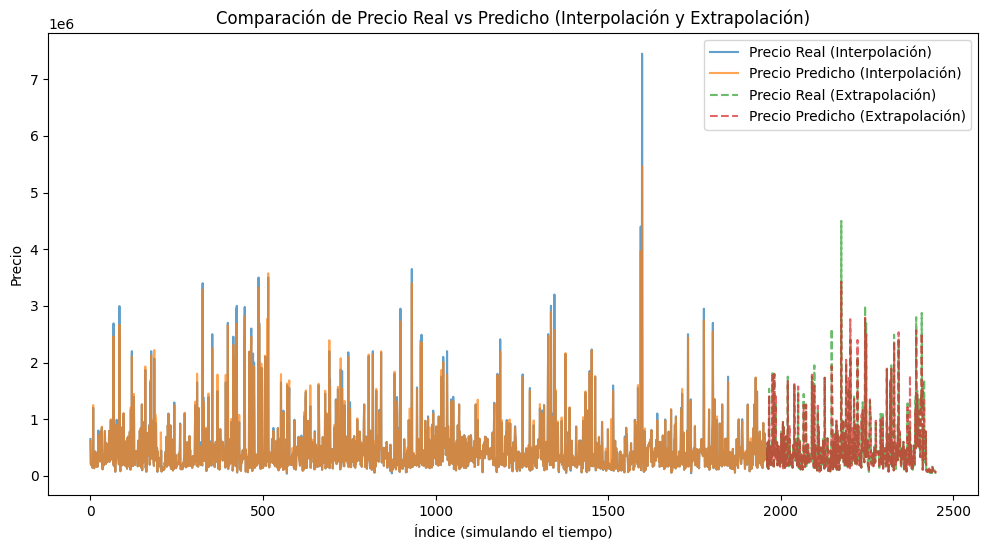

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Separar variables predictoras y variable objetivo
X = df_final.drop(columns=["price"])
y = df_final["price"]

# 2️⃣ Dividir 80% interpolación y 20% extrapolación
X_interpolation, X_extrapolation, y_interpolation, y_extrapolation = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 3️⃣ Dentro de la interpolación, dividir 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_interpolation, y_interpolation, test_size=0.2, random_state=42
)

# 4️⃣ Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_extrapolation_scaled = scaler.transform(X_extrapolation)

# 5️⃣ Entrenar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 6️⃣ Evaluación en train
y_train_pred = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# 7️⃣ Evaluación en test
y_test_pred = model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 8️⃣ Evaluación en extrapolación (solo para comparación)
y_extrapolation_pred = model.predict(X_extrapolation_scaled)
mae_extrapolation = mean_absolute_error(y_extrapolation, y_extrapolation_pred)
rmse_extrapolation = np.sqrt(mean_squared_error(y_extrapolation, y_extrapolation_pred))
r2_extrapolation = r2_score(y_extrapolation, y_extrapolation_pred)

# 9️⃣ Mostrar métricas de error en cada conjunto
df_metrics = pd.DataFrame({
    "Conjunto": ["Train", "Test", "Extrapolación"],
    "MAE": [mae_train, mae_test, mae_extrapolation],
    "RMSE": [rmse_train, rmse_test, rmse_extrapolation],
    "R²": [r2_train, r2_test, r2_extrapolation]
})

print("Evaluación del modelo en cada conjunto:")
print(df_metrics)

# 🔟 Graficar comparación de precios reales vs predichos
plt.figure(figsize=(12,6))
plt.plot(df_final.index[:len(y_interpolation)], y_interpolation, label="Precio Real (Interpolación)", alpha=0.7)
plt.plot(df_final.index[:len(y_interpolation)], model.predict(scaler.transform(X_interpolation)), label="Precio Predicho (Interpolación)", alpha=0.7)
plt.plot(df_final.index[len(y_interpolation):], y_extrapolation, label="Precio Real (Extrapolación)", alpha=0.7, linestyle='dashed')
plt.plot(df_final.index[len(y_interpolation):], y_extrapolation_pred, label="Precio Predicho (Extrapolación)", alpha=0.7, linestyle='dashed')
plt.xlabel("Índice (simulando el tiempo)")
plt.ylabel("Precio")
plt.legend()
plt.title("Comparación de Precio Real vs Predicho (Interpolación y Extrapolación)")
plt.show()


Evaluación del modelo:
            Conjunto           MAE           RMSE        R²
0  Cross-Val (Media)  31816.133532  149569.707066  0.900002
1               Test  23693.742883   77711.760415  0.967986
2      Extrapolación  27502.542571   91680.698597  0.967760


<ipython-input-11-5567be67f48d>:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mae_scores, rmse_scores, r2_scores], labels=["MAE", "RMSE", "R²"])


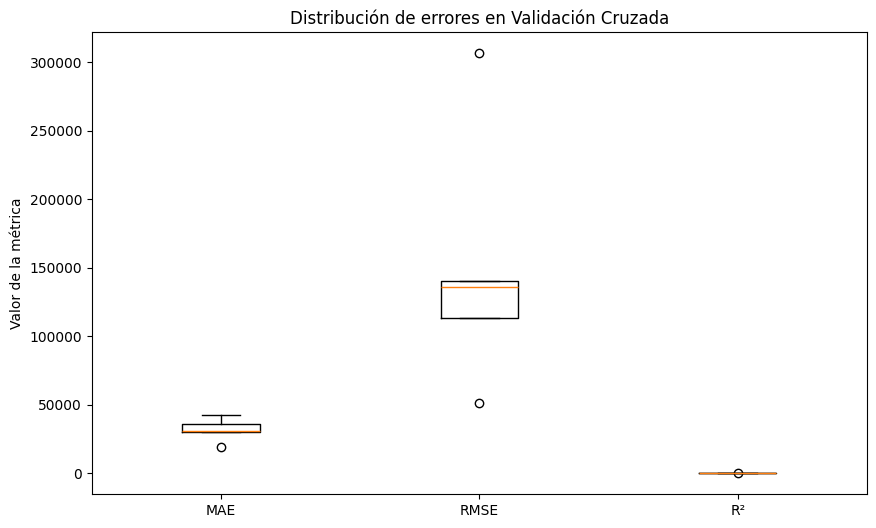

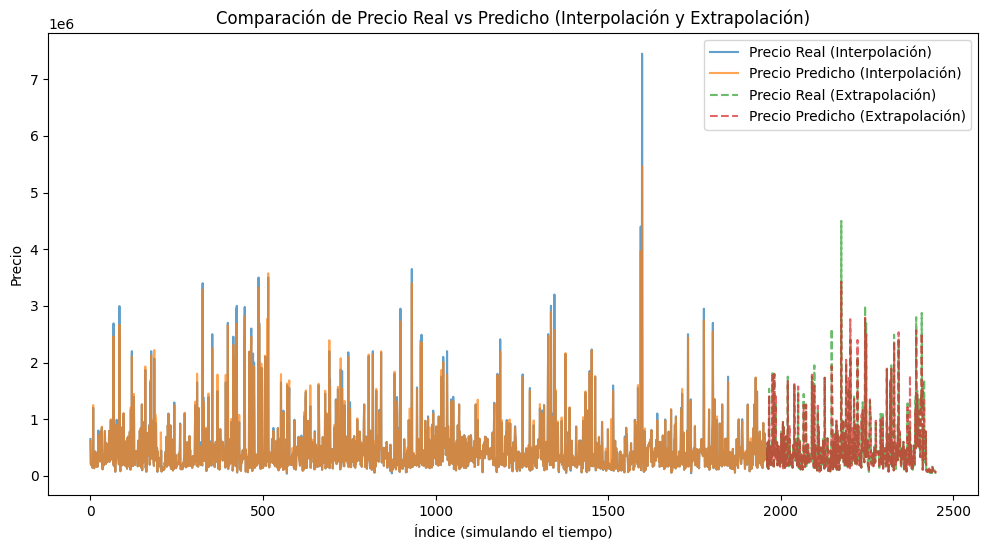

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Separar variables predictoras y variable objetivo
X = df_final.drop(columns=["price"])
y = df_final["price"]

# 2️⃣ Dividir 80% interpolación y 20% extrapolación
X_interpolation, X_extrapolation, y_interpolation, y_extrapolation = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 3️⃣ Dentro de la interpolación, dividir 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_interpolation, y_interpolation, test_size=0.2, random_state=42
)

# 4️⃣ Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_extrapolation_scaled = scaler.transform(X_extrapolation)

# 5️⃣ Configurar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 6️⃣ Aplicar validación cruzada con K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = -cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_absolute_error")
rmse_scores = np.sqrt(-cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_squared_error"))
r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="r2")

# 7️⃣ Entrenar modelo en todo el set de interpolación
model.fit(X_train_scaled, y_train)

# 8️⃣ Evaluación final en test
y_test_pred = model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 9️⃣ Evaluación en extrapolación (solo para comparación)
y_extrapolation_pred = model.predict(X_extrapolation_scaled)
mae_extrapolation = mean_absolute_error(y_extrapolation, y_extrapolation_pred)
rmse_extrapolation = np.sqrt(mean_squared_error(y_extrapolation, y_extrapolation_pred))
r2_extrapolation = r2_score(y_extrapolation, y_extrapolation_pred)

# 🔟 Mostrar métricas de validación cruzada y evaluación final
df_metrics = pd.DataFrame({
    "Conjunto": ["Cross-Val (Media)", "Test", "Extrapolación"],
    "MAE": [mae_scores.mean(), mae_test, mae_extrapolation],
    "RMSE": [rmse_scores.mean(), rmse_test, rmse_extrapolation],
    "R²": [r2_scores.mean(), r2_test, r2_extrapolation]
})

print("Evaluación del modelo:")
print(df_metrics)

# 📊 Graficar boxplots de los resultados de validación cruzada
plt.figure(figsize=(10,6))
plt.boxplot([mae_scores, rmse_scores, r2_scores], labels=["MAE", "RMSE", "R²"])
plt.title("Distribución de errores en Validación Cruzada")
plt.ylabel("Valor de la métrica")
plt.show()

# 📉 Graficar comparación de precios reales vs predichos
plt.figure(figsize=(12,6))
plt.plot(df_final.index[:len(y_interpolation)], y_interpolation, label="Precio Real (Interpolación)", alpha=0.7)
plt.plot(df_final.index[:len(y_interpolation)], model.predict(scaler.transform(X_interpolation)), label="Precio Predicho (Interpolación)", alpha=0.7)
plt.plot(df_final.index[len(y_interpolation):], y_extrapolation, label="Precio Real (Extrapolación)", alpha=0.7, linestyle='dashed')
plt.plot(df_final.index[len(y_interpolation):], y_extrapolation_pred, label="Precio Predicho (Extrapolación)", alpha=0.7, linestyle='dashed')
plt.xlabel("Índice (simulando el tiempo)")
plt.ylabel("Precio")
plt.legend()
plt.title("Comparación de Precio Real vs Predicho (Interpolación y Extrapolación)")
plt.show()


Importancia de las Variables (Agrupadas por Categoría):
           Feature  Importance
0             size    0.606628
7      priceByArea    0.253666
2        bathrooms    0.087011
14    neighborhood    0.024063
13        district    0.006205
4        longitude    0.004138
5         distance    0.004084
3         latitude    0.003323
1            rooms    0.003154
6        numPhotos    0.002556
12    municipality    0.001623
16         hasLift    0.000857
10    propertyType    0.000844
8            floor    0.000816
15          status    0.000676
11        exterior    0.000338
9   newDevelopment    0.000018


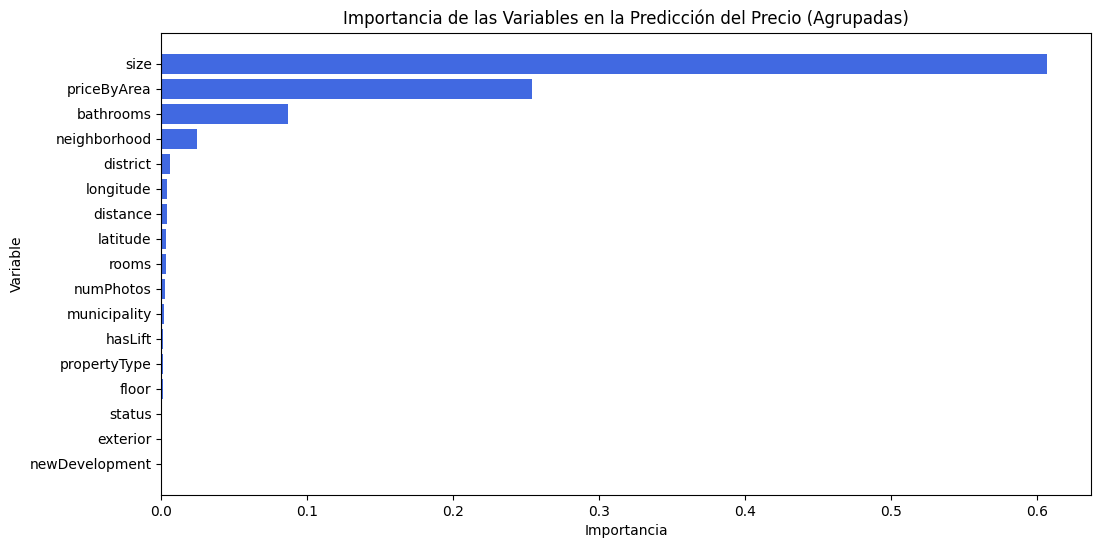

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1️⃣ Obtener la importancia de cada variable tras entrenar el modelo
feature_importance = model.feature_importances_

# 2️⃣ Crear un DataFrame con las importancias
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
})

# 3️⃣ Identificar las variables originales antes del One-Hot Encoding
categorical_original = ["propertyType", "operation", "floor", "exterior", "province", "municipality",
                         "district", "neighborhood", "status", "hasLift", "newDevelopment"]

# 4️⃣ Agrupar importancias sumando las transformaciones de One-Hot Encoding
feature_importance_grouped = {}

for feature, importance in zip(feature_importance_df["Feature"], feature_importance_df["Importance"]):
    base_feature = feature.split("_")[0]  # Obtener la parte base antes del One-Hot Encoding
    if base_feature in categorical_original:
        if base_feature in feature_importance_grouped:
            feature_importance_grouped[base_feature] += importance
        else:
            feature_importance_grouped[base_feature] = importance
    else:
        feature_importance_grouped[feature] = importance  # Mantener variables numéricas sin cambios

# 5️⃣ Convertir a DataFrame ordenado
feature_importance_grouped_df = pd.DataFrame(
    list(feature_importance_grouped.items()), columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

# 6️⃣ Mostrar la importancia de cada variable agrupada
print("Importancia de las Variables (Agrupadas por Categoría):")
print(feature_importance_grouped_df)

# 📊 7️⃣ Graficar la importancia de las variables agrupadas
plt.figure(figsize=(12,6))
plt.barh(feature_importance_grouped_df["Feature"], feature_importance_grouped_df["Importance"], color='royalblue')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las Variables en la Predicción del Precio (Agrupadas)")
plt.gca().invert_yaxis()  # Invertir el eje para mostrar la variable más importante arriba
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.298e+13, tolerance: 3.726e+10
  model = cd_fast.enet_coordinate_descent(


Importancia de las Variables (Agrupadas por Categoría):
           Feature     Importance
5         district  446382.414037
3     municipality  298519.852948
7     neighborhood  294995.079912
0        longitude   86457.796000
1      priceByArea   85756.040054
2        bathrooms   74847.012379
6     propertyType   62133.578316
4            rooms   45338.759127
8             size   22527.923409
9         latitude   21962.068674
10        distance   11663.714451
11       numPhotos   10053.434797
12         hasLift    8067.817982
14        exterior    7966.602688
13  newDevelopment    5881.372889
15           floor    3620.405560
16          status    3249.432719


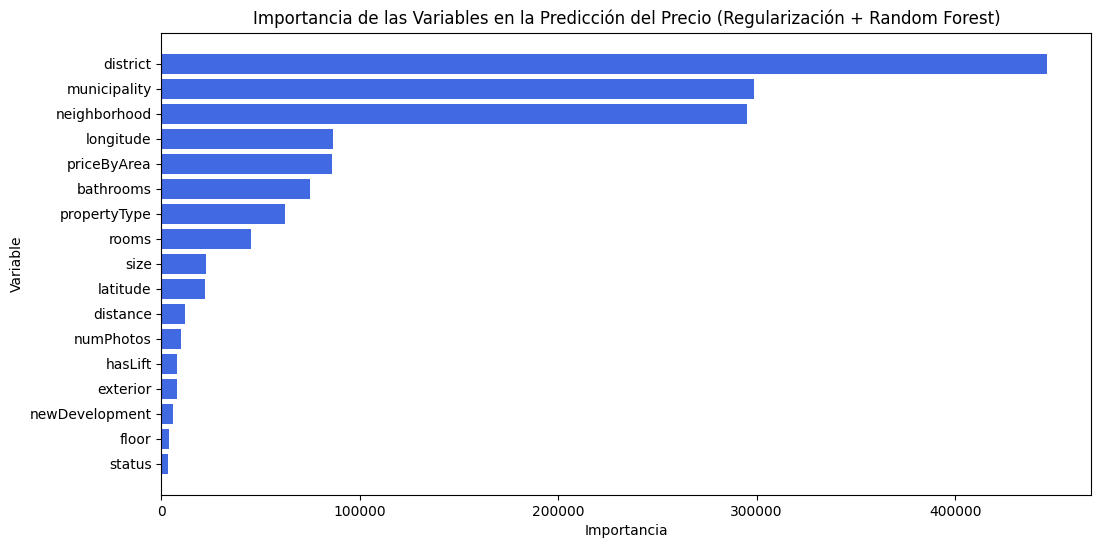

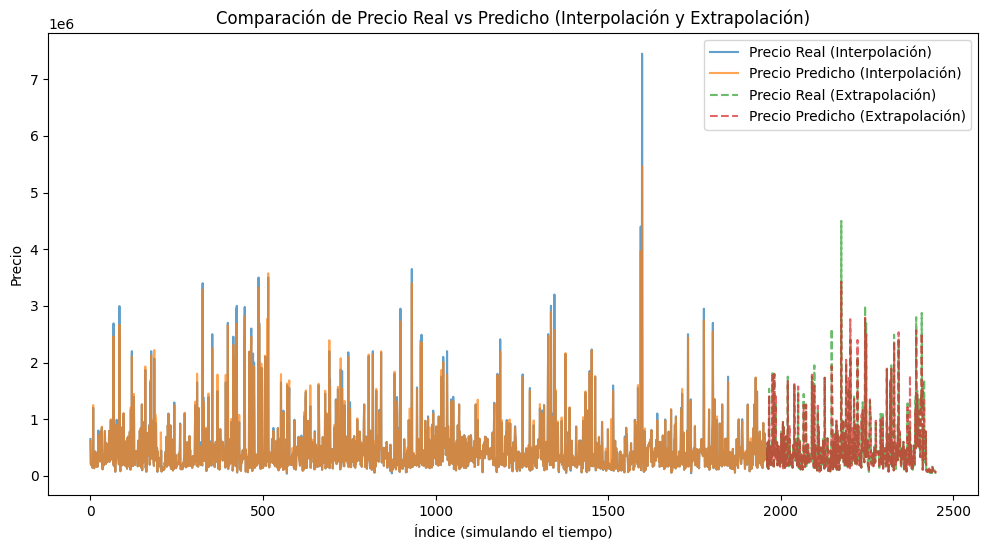

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Separar variables predictoras y variable objetivo
X = df_final.drop(columns=["price"])
y = df_final["price"]

# 2️⃣ Dividir 80% interpolación y 20% extrapolación
X_interpolation, X_extrapolation, y_interpolation, y_extrapolation = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 3️⃣ Dentro de la interpolación, dividir 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_interpolation, y_interpolation, test_size=0.2, random_state=42
)

# 4️⃣ Escalar las variables numéricas (para modelos que lo requieran)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_extrapolation_scaled = scaler.transform(X_extrapolation)

# 5️⃣ Aplicar regularización con Lasso para eliminar variables irrelevantes
lasso = Lasso(alpha=0.1)  # Ajusta alpha para mayor regularización
lasso.fit(X_train_scaled, y_train)

# Obtener coeficientes de Lasso (variables más importantes)
lasso_importance = np.abs(lasso.coef_)

# 6️⃣ Entrenar modelo Random Forest para obtener importancia de características
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_importance = rf_model.feature_importances_

# 7️⃣ Combinar resultados de Lasso y Random Forest en un DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Lasso Importance": lasso_importance,
    "Random Forest Importance": rf_importance
})

# Ordenar por la importancia promedio de ambos métodos
feature_importance_df["Mean Importance"] = (
    feature_importance_df["Lasso Importance"] + feature_importance_df["Random Forest Importance"]
) / 2

feature_importance_df = feature_importance_df.sort_values(by="Mean Importance", ascending=False)

# 8️⃣ Agrupar variables categóricas transformadas con One-Hot Encoding
categorical_original = ["propertyType", "operation", "floor", "exterior", "province", "municipality",
                         "district", "neighborhood", "status", "hasLift", "newDevelopment"]

feature_importance_grouped = {}

for feature, importance in zip(feature_importance_df["Feature"], feature_importance_df["Mean Importance"]):
    base_feature = feature.split("_")[0]  # Obtener la parte base antes del One-Hot Encoding
    if base_feature in categorical_original:
        if base_feature in feature_importance_grouped:
            feature_importance_grouped[base_feature] += importance
        else:
            feature_importance_grouped[base_feature] = importance
    else:
        feature_importance_grouped[feature] = importance  # Mantener variables numéricas sin cambios

# Convertir a DataFrame ordenado
feature_importance_grouped_df = pd.DataFrame(
    list(feature_importance_grouped.items()), columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

# 9️⃣ Mostrar la importancia de cada variable agrupada
print("Importancia de las Variables (Agrupadas por Categoría):")
print(feature_importance_grouped_df)

# 📊  🔟 Graficar la importancia de las variables agrupadas
plt.figure(figsize=(12,6))
plt.barh(feature_importance_grouped_df["Feature"], feature_importance_grouped_df["Importance"], color='royalblue')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las Variables en la Predicción del Precio (Regularización + Random Forest)")
plt.gca().invert_yaxis()  # Invertir el eje para mostrar la variable más importante arriba
plt.show()

# 📉 Graficar comparación de precios reales vs predichos
plt.figure(figsize=(12,6))
plt.plot(df_final.index[:len(y_interpolation)], y_interpolation, label="Precio Real (Interpolación)", alpha=0.7)
plt.plot(df_final.index[:len(y_interpolation)], model.predict(scaler.transform(X_interpolation)), label="Precio Predicho (Interpolación)", alpha=0.7)
plt.plot(df_final.index[len(y_interpolation):], y_extrapolation, label="Precio Real (Extrapolación)", alpha=0.7, linestyle='dashed')
plt.plot(df_final.index[len(y_interpolation):], y_extrapolation_pred, label="Precio Predicho (Extrapolación)", alpha=0.7, linestyle='dashed')
plt.xlabel("Índice (simulando el tiempo)")
plt.ylabel("Precio")
plt.legend()
plt.title("Comparación de Precio Real vs Predicho (Interpolación y Extrapolación)")
plt.show()

